In [1]:
from netgen.csg import *
from ngsolve import *
from ngsolve.webgui import Draw
# from netgen import gui
from ngsolve.comp import ConvertOperator
import numpy as np

import time
import pickle

# import sys
# # insert at position 1 in the path, as 0 is the path of this file.
# sys.path.insert(1, '..')
# from reduced_basis import *

Geometrie: Spule mit Luftspalt und Stahlplatte dazwischen

NGSWebGuiWidget(value={'ngsolve_version': '6.2.2008-118-gdb535faa3', 'mesh_dim': 3, 'order2d': 2, 'order3d': 2…

Text(0, 0.5, 'Magnetic Flux Density B in T')

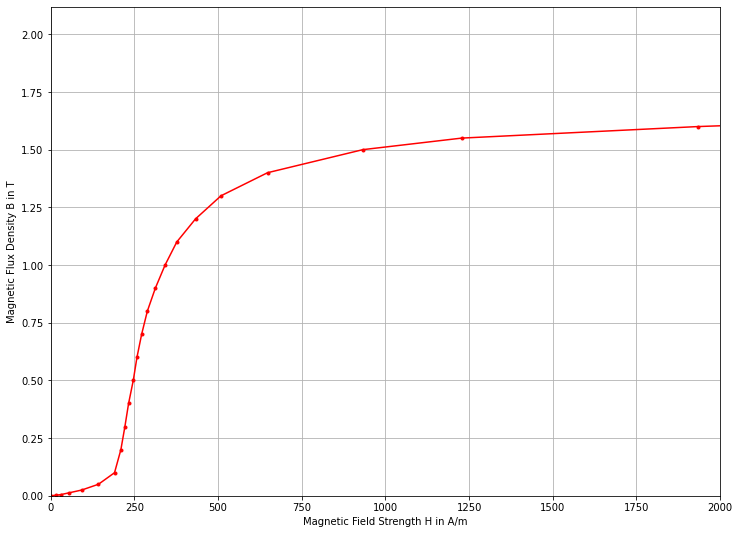

In [2]:
geo = CSGeometry()
box_size = 2
box = OrthoBrick(Pnt(-box_size,-box_size,-box_size), Pnt(box_size,box_size,box_size)).bc("outer")

lx = 0.4
lz = 0.5
d = 0.1
lp = 0.3
core = OrthoBrick(Pnt(-lx,-d/2,-lz),Pnt(lx,d/2,lz))- \
           OrthoBrick(Pnt(d-lx,-d,-lz+d),Pnt(lx-d,d,lz-d))- \
           OrthoBrick(Pnt(d,-d,-d/2),Pnt(lx+d,d,d/2)).maxh(0.2).mat('core')

plate = OrthoBrick(Pnt(d/2,-lp,-d/4),Pnt(2*lx-d,lp,d/4)).maxh(0.05).mat('plate')


coil = (Cylinder(Pnt(-lx+d/2,0,0), Pnt(-lx+d/2,0,1), 3*d) - \
        Cylinder(Pnt(-lx+d/2,0,0), Pnt(-lx+d/2,0,1), d)) * \
        OrthoBrick (Pnt(-1,-1,-lz+2*d),Pnt(1,1,lz-2*d)).maxh(0.2).mat('coil')

air = (box - coil - plate -core).mat('air') 

geo.Add(plate)
geo.Add(core)
geo.Add(coil)
geo.Add(air, transparent=True)

mesh = Mesh(geo.GenerateMesh(maxh=0.5))
mesh.Curve(3)
Draw (mesh)


from matplotlib import pyplot as plt

H_KL = [ -4.47197834e-13, 1.60000000e+01, 3.00000000e+01, 5.40000000e+01\
, 9.30000000e+01, 1.43000000e+02, 1.91000000e+02, 2.10000000e+02 \
, 2.22000000e+02, 2.33000000e+02, 2.47000000e+02, 2.58000000e+02\
, 2.72000000e+02, 2.89000000e+02, 3.13000000e+02, 3.42000000e+02\
, 3.77000000e+02, 4.33000000e+02, 5.09000000e+02, 6.48000000e+02\
, 9.33000000e+02, 1.22800000e+03, 1.93400000e+03, 2.91300000e+03\
, 4.99300000e+03, 7.18900000e+03, 9.42300000e+03, 9.42300000e+03\
, 1.28203768e+04, 1.65447489e+04, 2.07163957e+04, 2.55500961e+04\
, 3.15206135e+04, 4.03204637e+04, 7.73038295e+04, 1.29272791e+05\
, 1.81241752e+05, 2.33210713e+05, 2.85179674e+05, 3.37148635e+05\
, 3.89117596e+05, 4.41086557e+05, 4.93055518e+05, 5.45024479e+05\
, 5.96993440e+05, 6.48962401e+05, 7.00931362e+05, 7.52900323e+05\
, 8.04869284e+05, 8.56838245e+05, 9.08807206e+05, 9.60776167e+05\
, 1.01274513e+06, 1.06471409e+06, 1.11668305e+06, 1.16865201e+06\
, 1.22062097e+06, 1.27258993e+06, 1.32455889e+06, 1.37652785e+06\
, 1.42849682e+06, 1.48046578e+06, 1.53243474e+06, 1.58440370e+06\
, 1.63637266e+06, 1.68834162e+06, 1.74031058e+06, 1.79227954e+06\
, 1.84424850e+06, 1.89621746e+06, 1.94818643e+06, 2.00015539e+06\
, 2.05212435e+06, 2.10409331e+06, 2.15606227e+06, 2.20803123e+06\
, 2.26000019e+06]

B_KL = [ 0.00000000e+00, 2.50000000e-03, 5.00000000e-03, 1.25000000e-02\
, 2.50000000e-02, 5.00000000e-02, 1.00000000e-01, 2.00000000e-01\
, 3.00000000e-01, 4.00000000e-01, 5.00000000e-01, 6.00000000e-01\
, 7.00000000e-01, 8.00000000e-01, 9.00000000e-01, 1.00000000e+00\
, 1.10000000e+00, 1.20000000e+00, 1.30000000e+00, 1.40000000e+00\
, 1.50000000e+00, 1.55000000e+00, 1.60000000e+00, 1.65000000e+00\
, 1.70000000e+00, 1.75000000e+00, 1.80000000e+00, 1.80000000e+00\
, 1.86530612e+00, 1.93061224e+00, 1.99591837e+00, 2.06122449e+00\
, 2.12653061e+00, 2.19183673e+00, 2.25714286e+00, 2.32244898e+00\
, 2.38775510e+00, 2.45306122e+00, 2.51836735e+00, 2.58367347e+00\
, 2.64897959e+00, 2.71428571e+00, 2.77959184e+00, 2.84489796e+00\
, 2.91020408e+00, 2.97551020e+00, 3.04081633e+00, 3.10612245e+00\
, 3.17142857e+00, 3.23673469e+00, 3.30204082e+00, 3.36734694e+00\
, 3.43265306e+00, 3.49795918e+00, 3.56326531e+00, 3.62857143e+00\
, 3.69387755e+00, 3.75918367e+00, 3.82448980e+00, 3.88979592e+00\
, 3.95510204e+00, 4.02040816e+00, 4.08571429e+00, 4.15102041e+00\
, 4.21632653e+00, 4.28163265e+00, 4.34693878e+00, 4.41224490e+00\
, 4.47755102e+00, 4.54285714e+00, 4.60816327e+00, 4.67346939e+00\
, 4.73877551e+00, 4.80408163e+00, 4.86938776e+00, 4.93469388e+00\
, 5.00000000e+00]
bh_curve = BSpline (2, [0]+list(B_KL), list(H_KL)) # [0] + is needed!
energy_dens = bh_curve.Integrate()
# help(energy_dens.Integrate())
# print(energy_dens) # wie plotten


plt.figure(1, figsize=[12, 9])
plt.clf()
plt.plot(H_KL, B_KL, '.-r')
plt.xlim(0, 2000)
plt.ylim(0, 2.12)
plt.grid()
plt.xlabel("Magnetic Field Strength H in A/m")
plt.ylabel("Magnetic Flux Density B in T")

$$
\DeclareMathOperator{\Grad}{grad}
\DeclareMathOperator{\Curl}{curl}
\DeclareMathOperator{\Div}{div}
\DeclareMathOperator{\R}{\mathbb{R}}
\DeclareMathOperator{\real}{real}
\DeclareMathOperator{\reg}{reg}
$$
### Magnetostatisches Problem ohne Stahlplatte

Finde $ u \in H(\Curl)$ sodass 
$$
\int \mu^{-1} \Curl u \Curl v + \reg \int  u  v= \int j v \qquad  \forall \, v \in H(\Curl) \tag{1}
$$

Wir nehmen zunächst an, dass der `core` aus einem tollen Material besteht das immer eine hohe, lineare Permeabilität hat. Um in den nichtlinearen Bereich des Stahls zu kommen wollen wir ein Magnetfeld zwischen 1.0 und 1.5 Tesla im Lufspalt. 

In folgender Rechnung wird vernachlässigt, dass der Luftspalt (bzw dann die zwei Luftspalte) kleiner ist wenn sich eine Stahlplatte darin befindet, daher ist das Ziel ohne Stahlplatte auf ca 1T zu kommen. Außerdem wird angenommen dass es keine Streuflüsse gibt. 

Es gilt für das Magnetfeld im Luftspalt $B_l$ gilt $B = \frac{\Phi}{A}$ Wobei $\Phi$ die magnetische Flussdichte und $A$ die Querschnittsfläche des Luftspalts ist. Die von der Spule erzeugte Durchflutung $\Theta$ beträgt $4d(l_z-d)*j$, falls die Stromdichte $j$ konstant ist.  Wenn wir die im Kern abfallende magnetische Spannung vernachlässigen gilt wegen $\Theta = R\Phi$ und des magnetische Widerstands im Luftspalt $R = \frac{d}{\mu_0A}$ dass    

$$ 
4d(l_z-d)j = \Theta = \frac{d}{\mu_0A}\Phi = \frac{d}{\mu_0}B.
$$

Die Stromdichte ergibt sich also ungefähr als 
$$
 j \approx \frac{B}{4\mu_0(l_z-d) } \approx 5\cdot10^5.
$$

Es stellt sich heraus, dass $j \approx 7\cdot10^5$ zum gewünschten einen Tesla führt. 


### Harmonische Magnetisierung

Sei $j(x,t) = j(x)\cos(\omega t)$. Dann lautet das Problem


Finde $ u \in C(\R^+; H(\Curl))$ sodass 
$$
\int_{\text{plate}} H(\Curl u )\Curl v + \frac{1}{\mu}\int_{\Omega\setminus \text{plate}} \Curl u \Curl v+ \reg \int_{\Omega\setminus \text{plate}} u v -\int j v = -\sigma \int_{\text{plate}} \partial_t u v   \qquad  \forall \, v \in H(\Curl) \tag{2}
$$

Mit dem Funktional 


$$
F(u) := \int_{\text{plate}} w(|\Curl u|) + \frac{1}{2\mu}\int_{\Omega\setminus \text{plate}} (\Curl u )^2+ \reg \int \frac{1}{2} u^2  - \int ju  
$$

ist das äquivalent zu: Finde ein $u\in H(\Curl)$ sodass 
$$
\partial_v F(u) := \lim_{\epsilon \rightarrow 0} \frac{d}{d\epsilon} F(u+\epsilon v) = -\sigma \int_{\text{plate}} \partial_t u v \qquad \forall v \in H(\Curl)
$$

wobei 

$$
w(x) = \int_0^{x} \frac{1}{\mu(s)}s ~ ds
$$

Impliziter Euler:
$$
\partial_v F(u^{n+1}) = -\sigma \int_{\text{plate}} \frac{u^{n+1} - u^{n}}{\Delta t}v \qquad \forall v \in H(\Curl) \tag{3}
$$

Die Lösung dieser Gleichung ist äquivalent zur Minimierung des Funktionals 

$$
G(u) = F(u)+\frac{\sigma}{2\Delta t }\int_{\text{plate}} (u-u^n)^2
$$

wobei $u^{n+1} := u$.


In [3]:
fes = HCurl(mesh, order = 3, dirichlet="outer", nograds=True)
u,v = fes.TnT()
from math import pi

mu0 = 4*pi*1e-7
mur = { "core" : 1e10, "coil" : 1, "air" : 1}
sigma = {'plate': 8.6*1e6}
omega = 2*np.pi*30 # angular frequency
dt = 5e-2
tval = np.arange(0.1,0.5,dt)
print(tval)


t = Parameter(0)
j = CoefficientFunction((-y,lx-d/2+x,0))*CoefficientFunction(-1/sqrt(y**2+(lx-d/2+x)**2)*cos(t*omega)*1e5)

gfu = GridFunction(fes)
gfu_old = GridFunction(fes)

a = BilinearForm(fes)
for mat in mur.keys():
    a += Variation( 1/(2*mu0*mur[mat])*curl(u)*curl(u)*dx(mat) + 1e-6*1/(2*mu0*mur[mat])*u*u*dx(mat))
a += Variation(energy_dens(sqrt(1e-12+ curl(u)*curl(u))) * dx('plate'))
a += Variation(sigma['plate']/(2*dt)*(u-gfu_old)**2*dx('plate'))
a += Variation(j*u*dx('coil'))
    

## TODO: hier Abwandlung des preconditioning Beispiels
c = Preconditioner(a, "bddc")

[0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45]


Erzeuge RB

In [5]:
import logging
from datetime import datetime

date = datetime.now().strftime("%d-%b-%Y (%H:%M:%S)")
logging.basicConfig(filename='output/nonlinear_{}.log'.format(date),level=logging.DEBUG)


TOL = 1e-8
MAX_IT = 30
MAX_STEPS = len(tval)
pnt = mesh(lx-d/2, 0, 0)

logging.info("""
TOL = {}
MAX_IT = {}
MAX_STEPS = {}
eval point = {}
angluar frequency = {}
""".format(TOL, MAX_IT, MAX_STEPS, (lx-d/2, 0, 0), omega))


values = [None]*int(1/dt)
# achtung [np.zeros(MAX_STEPS)]*3 geht nicht weil Referenz auf gleiches Objekt
plot_data = {'B': [np.zeros(MAX_STEPS) for _ in range(3)], 
             'A': [np.zeros(MAX_STEPS) for _ in range(3)],
             'E': [np.zeros(MAX_STEPS) for _ in range(3)]} 

mv = None

# p, weights = np.polynomial.legendre.leggauss(MAX_STEPS)
# tval = 0.5*(p + 1)*0.5


print(tval)

with TaskManager():

    res = gfu.vec.CreateVector()
    w = gfu.vec.CreateVector()
    tmp = gfu.vec.CreateVector()
    
#     gfu.Set((sin(x),0,0)) # betragsmäßig zu große Anfangsdaten sind ein Problem!
    gfu.vec[:] = 0
    
#     for step in range(MAX_STEPS):
    for step in range(len(tval)):
        print("\nImplicit Euler Iteration: {}\n".format(step))
        logging.info("\nImplicit Euler Iteration: {}\n".format(step))
       
        t.Set(tval[step])

        '''needed if not equidistant integration points'''
#         if step == 0: 
#             dt = tval[0]
#         else:
#             dt = tval[step] - tval[step-1]
        gfu_old.vec.data = gfu.vec

    
        ####### begin solve problem

        err = 1
        it = 0

        while err > TOL and it < MAX_IT:
            it += 1

            e_old = a.Energy(gfu.vec)

            a.Apply(gfu.vec, res)

            a.AssembleLinearization(gfu.vec)

            solvers.CG(sol=w, rhs=res, mat=a.mat, pre=c.mat, printrates=False)

            err = abs(InnerProduct(w, res))

            print(" error {} in newton iteration {}".format(err, it))
            logging.info(" error {} in newton iteration {}".format(err, it))

            tmp.data = gfu.vec - w

            e_new = a.Energy(tmp)
#             print(" old energy: {}, new energy: {}".format(e_old, e_new))

            tau = 1
            cnt = 1
            while e_new > e_old:
                tau *= max(0.1, 1-0.1*cnt)
                cnt += 1
                tmp.data = gfu.vec - tau*w
                e_new = a.Energy(tmp)
#                 print(" new energy: {} with tau: {}".format( e_new, tau))

            gfu.vec.data = tmp

        index = int(step % (1/dt))
        if (values[index]):
            print("B({}): {}\nB({}-1): {}".format(t.Get(), values[index], t.Get(), curl(gfu)(pnt)))
            logging.info("B({}): {}\nB({}-1): {}".format(t.Get(), values[index], t.Get(), curl(gfu)(pnt)))

        else:
            print("B({}): {}".format(t.Get(), curl(gfu)(pnt)))
            logging.info("B({}): {}".format(t.Get(), curl(gfu)(pnt)))

        values[index] = curl(gfu)(pnt)
        
        for i in range(3):
            plot_data['B'][i][step] = curl(gfu)(pnt)[i]
            plot_data['A'][i][step] = gfu(pnt)[i]
            plot_data['E'][i][step] = ((gfu-gfu_old)/dt)(pnt)[i]

        ####### end solve problem
    
#         t.Set(t.Get()+dt)
        
        if mv is None:
            mv = MultiVector(gfu.vec, 1)
        else:
            mv.AppendOrthogonalize(gfu.vec)
#             mv.Append(gfu.vec)

def show():
    Draw (curl(gfu), mesh, "B-field", draw_surf=False)
    Draw ((gfu-gfu_old)/dt, mesh, "E-field", draw_surf=False)
    mip = mesh(lx-d/2, 0, 0)
    print(curl(gfu)(mip), np.linalg.norm(curl(gfu)(mip)))
    


[0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45]

Implicit Euler Iteration: 0

 error 352.8181219446863 in newton iteration 1
 error 4.541289927237628 in newton iteration 2
 error 0.41049857627744585 in newton iteration 3
 error 0.04142254964153088 in newton iteration 4
 error 0.011665142854050459 in newton iteration 5
 error 0.0005846569538370967 in newton iteration 6
 error 3.052610759657238e-05 in newton iteration 7
 error 4.778360960569286e-07 in newton iteration 8
 error 6.897025273381269e-12 in newton iteration 9
B(0.1): (0.001456647460932537, -0.04025392627254077, -0.023169201016717256)

Implicit Euler Iteration: 1

 error 1410.3451729564952 in newton iteration 1
 error 0.7294197253591559 in newton iteration 2
 error 0.31324404534215017 in newton iteration 3
 error 0.015405948460362865 in newton iteration 4
 error 0.003160061142654367 in newton iteration 5
 error 7.859002390813818e-05 in newton iteration 6
 error 8.435654449086232e-08 in newton iteration 7
 error 1.349936964239884e-13 

In [ ]:
%matplotlib notebook
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d

fig = plt.figure()
axis = plt.axes()

print(tval, plot_data['B'][0])
# x_val = np.arange(0, MAX_STEPS*dt, dt)
# x_val = tval
plt.plot(tval, plot_data['B'][0], label='x')
plt.plot(tval, plot_data['B'][1], label='y')
plt.plot(tval, plot_data['B'][2], label='z')
plt.title("B(0.35,0,0)")
plt.legend()

In [ ]:
# save data
npmv = np.zeros((len(mv[0]), len(mv)))#, dtype=complex)
for j in range(len(mv)):
    npmv[:,j] = mv[j].FV().NumPy()
    
outputFile = 'output/mv_{}.data'.format(date)
fw = open(outputFile, 'wb')
pickle.dump(npmv, fw)
fw.close()

# inputFile = 'test.data'
# fd = open(inputFile, 'rb')
# dataset = pickle.load(fd)
# print (type(dataset))

### Reduced Basis

Schreibweisen:
* $n$ ...  Zeit
* $N$ ... Anzahl snapshots
* $\{\zeta_1, .., \zeta_N\}$ ... Reduced Basis
* $\alpha_i$ ...  Koeffizienten

Achtung: Einstein!

Damit $u^n = \alpha_i^n\zeta_i$ (Zeit-diskret) bzw $u(t) = \alpha_i(t)\zeta_i$ (kontinuierlich in der Zeit) . 

Man kann (2) schreiben als
$$
\int_{\text{plate}} H(\alpha_i(t) \Curl  \zeta_i) \Curl \zeta_k + \underbrace{\frac{1}{\mu}\int_{\Omega\setminus \text{plate}} \Curl  \zeta_i \Curl \zeta_k+ \reg \alpha_i(t) \int_{\Omega\setminus \text{plate}} \zeta_i \zeta_k}_m -\underbrace{\int j \zeta_k}_{d} = -\partial_t \alpha_i(t) \underbrace{\sigma \int_{\text{plate}}   \zeta_i \zeta_k }_{b}
$$


<!-- Rechte Seite von (3):

$$
 -\alpha_i^{n+1}\frac{\sigma}{\Delta t} \int_{\text{plate}} \zeta_i\zeta_k +\alpha_i^{n}\frac{\sigma}{\Delta t} \int_{\text{plate}} \zeta_i\zeta_k
$$

Linke Seite von (3):

$$
\int H(\alpha_i^{n+1} \Curl  \zeta_i) \Curl \zeta_k + \reg \alpha_i^{n+1} \int_{\Omega\setminus \text{plate}} \zeta_i \zeta_k -\int j \zeta_k
$$ -->

In [4]:
# load data
inputFile = 'output/mv.data'
fd = open(inputFile, 'rb')
npmv = pickle.load(fd)

V = MultiVector(npmv.shape[0],npmv.shape[1], False)

for j in range(len(V)):
    V[j].FV().NumPy()[:] = npmv[:,j]
    
# print(len(mv[0]))

In [ ]:
# # p, weights = np.polynomial.legendre.leggauss(len(V))
# # # tval = (p + 1)*0.25
# # weights = 0.25*weights

# tmp = gfu.vec.CreateVector()
# tmp2 = gfu.vec.CreateVector()
# gftmp = GridFunction(fes)

# # help(tmp)
# def F(inmv, outmv):
#     for i in range(len(inmv)):
#         tmp = gfu.vec.CreateVector()
# #         print("vec ", i)
#         gftmp.vec.data = inmv[i]
#         t.Set(tval[i])
#         a.Apply(gftmp.vec, tmp)
#         print(tmp[0])
#         outmv[i] = binv * tmp
# #         outmv[i] = tmp2.Evaluate()
#         print(outmv[i][0])

# vec = gfu.vec.CreateVector()
# mv = MultiVector(gftmp.vec, len(V))


# # F(V, mv)
# gftmp.vec.data = mv[1]
# Draw(gftmp, mesh)

In [ ]:
# fes = HCurl(mesh, order = 3, dirichlet="outer", nograds=True)
# u, v = fes.TnT()
# from math import pi

# mu0 = 4*pi*1e-7
# mur = { "core" : 1e10, "coil" : 1, "air" : 1}
# sigma = {'plate': 8.6*1e6}
# omega = 2*np.pi*30 # angular frequency
# dt = 5e-2


# t = Parameter(0)
# j = CoefficientFunction((-y,lx-d/2+x,0))*CoefficientFunction(-1/sqrt(y**2+(lx-d/2+x)**2)*cos(t*omega)*1e5)

# gfu = GridFunction(fes)
# gfu_old = GridFunction(fes)

# proj = Projector(fes.FreeDofs(), True)
# help(Projector)
# gftmp = GridFunction(fes)
# def g(w, ret):
#     gftmp.vec.data = V*w
#     for i in range(len(V)):
#         ret[i] = Integrate(InnerProduct(
#             bh_curve(sqrt(1e-12+ curl(gftmp)*curl(gftmp)))*gftmp,
#             V[i]),mesh)

with TaskManager():
    gftmp = GridFunction(fes)

    g = BilinearForm(fes)
    g += Variation(energy_dens(sqrt(1e-12+ curl(u)*curl(u))) * dx('plate'))


    m = BilinearForm(fes)
    for mat in mur.keys():
        m += 1/(2*mu0*mur[mat])*curl(u)*curl(v)*dx(mat) + 1e-6*1/(2*mu0*mur[mat])*u*v*dx(mat)
    m.Assemble()
    
#     dm = LinearForm(fes)
#     for mat in mur.keys():
#         dm += 1/(2*mu0*mur[mat])*curl(v)*dx(mat) + 1e-6*1/(2*mu0*mur[mat])*v*dx(mat)
#     dm.Assemble()

    b = BilinearForm(fes)
    b += sigma['plate']*u*v*dx('plate')
    b.Assemble()
    
#     db = LinearForm(fes)
#     db += sigma['plate']*v*dx('plate')
#     db.Assemble()

    # build reduced matrices
    mv = MultiVector(gftmp.vec, len(V))

    mv[:len(V)] = m.mat * V
    mred = InnerProduct(V,mv)

    mv[:len(V)] = b.mat * V
    bred = InnerProduct(V,mv)
    
    # build reduced vectors
    mv = MultiVector(gftmp.vec, 1)

#     mv[0] = dm.vec
#     dmred = InnerProduct(V, mv)

    mv[0] = db.vec
    dbred = InnerProduct(V, mv)


    # gibt es matrizen mit parametern? 
    cur = LinearForm(fes)
    j*v*dx('coil')

    dt = 5e-3
    tval = np.arange(0.1,0.25,dt)

In [ ]:
w[:] = 0
print(w)

In [ ]:
date = datetime.now().strftime("%d-%b-%Y (%H:%M:%S)")
logging.basicConfig(filename='output/reduced_{}.log'.format(date),level=logging.DEBUG)

TOL = 1e-8
MAX_IT = 30
# MAX_STEPS = len(tval)
pnt = mesh(lx-d/2, 0, 0)

logging.info("""
TOL = {}
MAX_IT = {}
tval = {}
eval point = {}
angluar frequency = {}
""".format(TOL, MAX_IT, tval, (lx-d/2, 0, 0), omega))


values = [None]*int(1/dt)
# achtung [np.zeros(MAX_STEPS)]*3 geht nicht weil Referenz auf gleiches Objekt
plot_data_red = {'B': [np.zeros(len(tval)) for _ in range(3)], 
             'A': [np.zeros(len(tval)) for _ in range(3)],
             'E': [np.zeros(len(tval)) for _ in range(3)]} 
mv = None

# p, weights = np.polynomial.legendre.leggauss(MAX_STEPS)
# tval = 0.5*(p + 1)*0.5


print(tval)

with TaskManager():

    
    w = Vector(len(V))
    w_old = Vector(len(V))
    res = gfu.vec.CreateVector()

    
    w[:] = 0 # initial value
    
    mv1 = MultiVector(cur.vec, 1)
    mvV = MultiVector(cur.vec, V)
    
    mat= Matrix(len(V), len(V))

    
    
#     gfu.Set((sin(x),0,0)) # betragsmäßig zu große Anfangsdaten sind ein Problem!
    
#     for step in range(MAX_STEPS):
    for step in range(len(tval)):
        print("\nImplicit Euler Iteration: {}\n".format(step))
        logging.info("\nImplicit Euler Iteration: {}\n".format(step))
       
        t.Set(tval[step])
        
        # assemble and project time dependent term
        cur.Assemble()
        mv1[0] = cur.vec
        curred = InnerProduct(V, mv1)
        
        '''needed if not equidistant integration points'''
#         if step == 0: 
#             dt = tval[0]
#         else:
#             dt = tval[step] - tval[step-1]
        
#         gfu_old.vec.data = gfu.vec

        w_old[:] =  w

    
        ####### begin solve problem

        err = 1
        it = 0

        while err > TOL and it < MAX_IT:
            it += 1
            
            gfu.vec.data = V * w
            
            # TODO:
#             e_old = g.Energy(gfu.vec)
            
#             print(e_old)


            g.Apply(gfu.vec, res)
    
            mv1[0] = res.vec
            resred = InnerProduct(V, mv1)

            g.AssembleLinearization(gfu.vec)
        
            
            
            solvers.CG(sol=w, rhs=res, mat=a.mat, pre=c.mat, printrates=False)

            err = abs(InnerProduct(w, res))

            print(" error {} in newton iteration {}".format(err, it))
            logging.info(" error {} in newton iteration {}".format(err, it))

            tmp.data = gfu.vec - w

            e_new = a.Energy(tmp)
#             print(" old energy: {}, new energy: {}".format(e_old, e_new))

            tau = 1
            cnt = 1
            while e_new > e_old:
                tau *= max(0.1, 1-0.1*cnt)
                cnt += 1
                tmp.data = gfu.vec - tau*w
                e_new = a.Energy(tmp)
#                 print(" new energy: {} with tau: {}".format( e_new, tau))

            gfu.vec.data = tmp

        index = int(step % (1/dt))
        if (values[index]):
            print("B({}): {}\nB({}-1): {}".format(t.Get(), values[index], t.Get(), curl(gfu)(pnt)))
            logging.info("B({}): {}\nB({}-1): {}".format(t.Get(), values[index], t.Get(), curl(gfu)(pnt)))

        else:
            print("B({}): {}".format(t.Get(), curl(gfu)(pnt)))
            logging.info("B({}): {}".format(t.Get(), curl(gfu)(pnt)))

        values[index] = curl(gfu)(pnt)
        
        for i in range(3):
            plot_data_red['B'][i][step] = curl(gfu)(pnt)[i]
            plot_data_red['A'][i][step] = gfu(pnt)[i]
            plot_data_red['E'][i][step] = ((gfu-gfu_old)/dt)(pnt)[i]

        ####### end solve problem
    
#         t.Set(t.Get()+dt)
        
        if mv is None:
            mv = MultiVector(gfu.vec, 1)
        else:
            mv.AppendOrthogonalize(gfu.vec)
#             mv.Append(gfu.vec)

def show():
    Draw (curl(gfu), mesh, "B-field", draw_surf=False)
    Draw ((gfu-gfu_old)/dt, mesh, "E-field", draw_surf=False)
    mip = mesh(lx-d/2, 0, 0)
    print(curl(gfu)(mip), np.linalg.norm(curl(gfu)(mip)))
    
